<a href="https://colab.research.google.com/github/fralfaro/r4ds-book/blob/main/docs/07_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis 

## Introduction

This chapter will show you how to use visualization and transformation to explore your data in a systematic way, a task that statisticians call exploratory data analysis, or EDA for short.
EDA is an iterative cycle.
You:

1.  Generate questions about your data.

2.  Search for answers by visualizing, transforming, and modelling your data.

3.  Use what you learn to refine your questions and/or generate new questions.

EDA is not a formal process with a strict set of rules.
More than anything, EDA is a state of mind.
During the initial phases of EDA you should feel free to investigate every idea that occurs to you.
Some of these ideas will pan out, and some will be dead ends.
As your exploration continues, you will home in on a few particularly productive areas that you'll eventually write up and communicate to others.

EDA is an important part of any data analysis, even if the questions are handed to you on a platter, because you always need to investigate the quality of your data.
Data cleaning is just one application of EDA: you ask questions about whether your data meets your expectations or not.
To do data cleaning, you'll need to deploy all the tools of EDA: visualization, transformation, and modelling.

### Prerequisites

In this chapter we'll combine what you've learned about dplyr and ggplot2 to interactively ask questions, answer them with data, and then ask new questions.



In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()




## Questions

> "There are no routine statistical questions, only questionable statistical routines." --- Sir David Cox

> "Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise." --- John Tukey

Your goal during EDA is to develop an understanding of your data.
The easiest way to do this is to use questions as tools to guide your investigation.
When you ask a question, the question focuses your attention on a specific part of your dataset and helps you decide which graphs, models, or transformations to make.

EDA is fundamentally a creative process.
And like most creative processes, the key to asking *quality* questions is to generate a large *quantity* of questions.
It is difficult to ask revealing questions at the start of your analysis because you do not know what insights are contained in your dataset.
On the other hand, each new question that you ask will expose you to a new aspect of your data and increase your chance of making a discovery.
You can quickly drill down into the most interesting parts of your data---and develop a set of thought-provoking questions---if you follow up each question with a new question based on what you find.

There is no rule about which questions you should ask to guide your research.
However, two types of questions will always be useful for making discoveries within your data.
You can loosely word these questions as:

1.  What type of variation occurs within my variables?

2.  What type of covariation occurs between my variables?

The rest of this chapter will look at these two questions.
I'll explain what variation and covariation are, and I'll show you several ways to answer each question.
To make the discussion easier, let's define some terms:

-   A **variable** is a quantity, quality, or property that you can measure.

-   A **value** is the state of a variable when you measure it.
    The value of a variable may change from measurement to measurement.

-   An **observation** is a set of measurements made under similar conditions (you usually make all of the measurements in an observation at the same time and on the same object).
    An observation will contain several values, each associated with a different variable.
    I'll sometimes refer to an observation as a data point.

-   **Tabular data** is a set of values, each associated with a variable and an observation.
    Tabular data is *tidy* if each value is placed in its own "cell", each variable in its own column, and each observation in its own row.

So far, all of the data that you've seen has been tidy.
In real-life, most data isn't tidy, so we'll come back to these ideas again in @sec-rectangling.

## Variation

**Variation** is the tendency of the values of a variable to change from measurement to measurement.
You can see variation easily in real life; if you measure any continuous variable twice, you will get two different results.
This is true even if you measure quantities that are constant, like the speed of light.
Each of your measurements will include a small amount of error that varies from measurement to measurement.
Variables can also vary if you measure across different subjects (e.g. the eye colors of different people) or different times (e.g. the energy levels of an electron at different moments).
Every variable has its own pattern of variation, which can reveal interesting information about how that variable varies between measurements on the same observation as well as across observations.
The best way to understand that pattern is to visualize the distribution of the variable's values.

### Visualizing distributions

How you visualize the distribution of a variable will depend on whether the variable is categorical or continuous.
A variable is **categorical** if it can only take one of a small set of values.
In R, categorical variables are usually saved as factors or character vectors.
To examine the distribution of a categorical variable, you can use a bar chart:


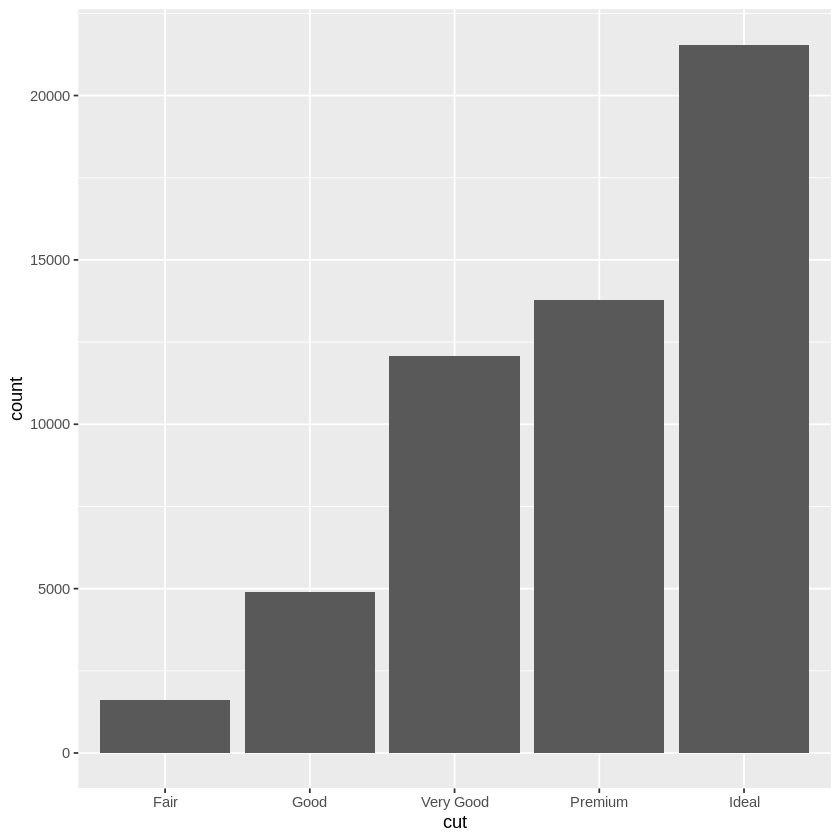

In [2]:
ggplot(data = diamonds, mapping = aes(x = cut)) +
  geom_bar()


The height of the bars displays how many observations occurred with each x value.
You can compute these values manually with `dplyr::count()`:



In [3]:
diamonds |> 
  count(cut)

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551



A variable is **continuous** if it can take any of an infinite set of ordered values.
Numbers and date-times are two examples of continuous variables.
To examine the distribution of a continuous variable, you can use a histogram:



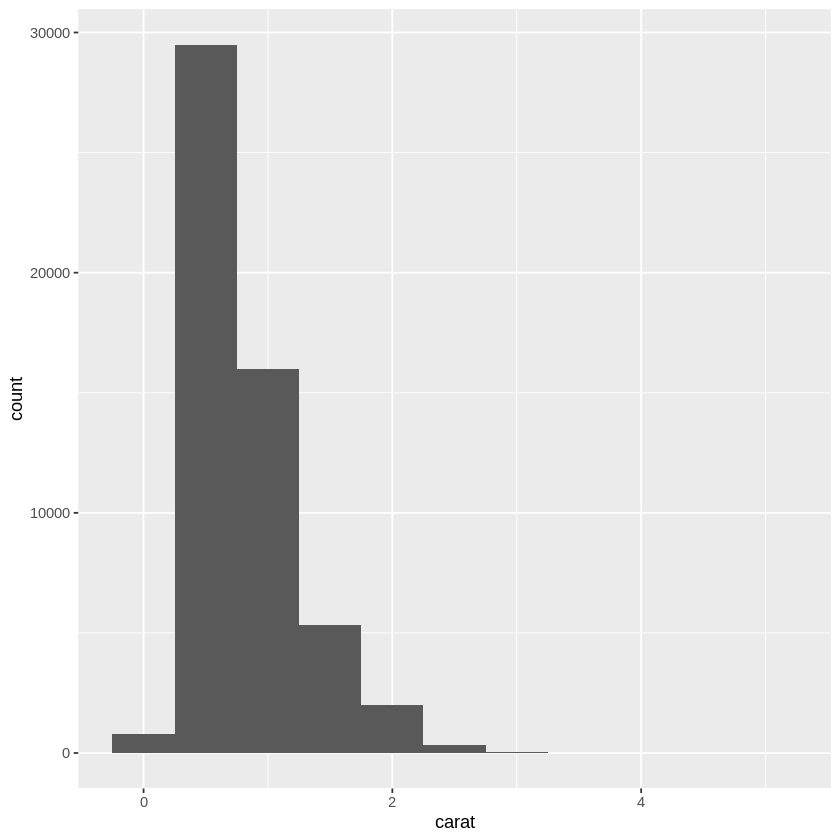

In [4]:
ggplot(data = diamonds, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.5)


You can compute this by hand by combining `dplyr::count()` and `ggplot2::cut_width()`:



In [5]:
diamonds |> 
  count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
<fct>,<int>
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4



A histogram divides the x-axis into equally spaced bins and then uses the height of a bar to display the number of observations that fall in each bin.
Note that even though it's not possible to have a `carat` value that is smaller than 0 (since weights of diamonds, by definition, are positive values), the bins start at a negative value (-0.25) in order to create bins of equal width across the range of the data with the center of the first bin at 0.
This behavior is also apparent in the histogram above, where the first bar ranges from -0.25 to 0.25.
The tallest bar shows that almost 30,000 observations have a `carat` value between 0.25 and 0.75, which are the left and right edges of the bar centered at 0.5.

You can set the width of the intervals in a histogram with the `binwidth` argument, which is measured in the units of the `x` variable.
You should always explore a variety of binwidths when working with histograms, as different binwidths can reveal different patterns.
For example, here is how the graph above looks when we zoom into just the diamonds with a size of less than three carats and choose a smaller binwidth.


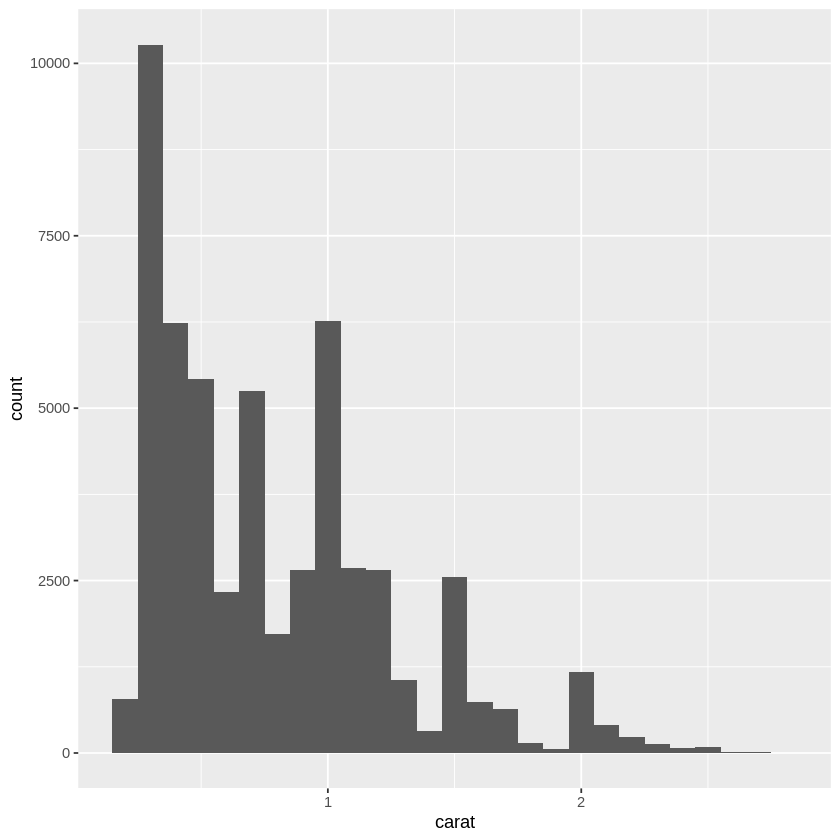

In [6]:
smaller <- diamonds |> 
  filter(carat < 3)

ggplot(data = smaller, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.1)


If you wish to overlay multiple histograms in the same plot, I recommend using `geom_freqpoly()` instead of `geom_histogram()`.
`geom_freqpoly()` performs the same calculation as `geom_histogram()`, but instead of displaying the counts with bars, uses lines instead.
It's much easier to understand overlapping lines than bars.


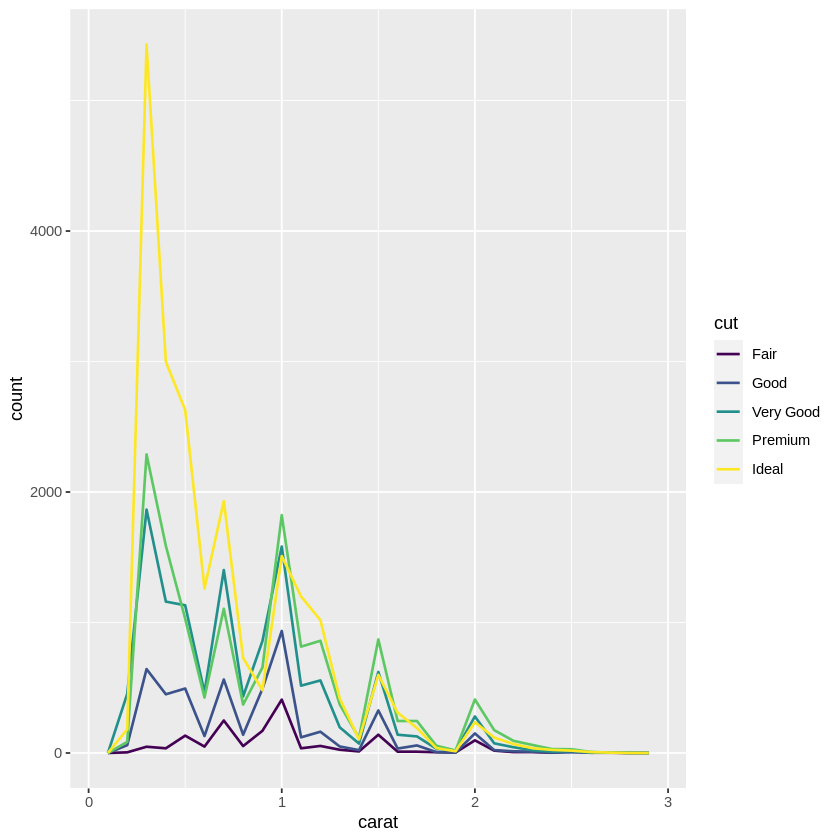

In [7]:
ggplot(data = smaller, mapping = aes(x = carat, color = cut)) +
  geom_freqpoly(binwidth = 0.1, size = 0.75)


We've also customized the thickness of the lines using the `size` argument in order to make them stand out a bit more against the background.

There are a few challenges with this type of plot, which we will come back to in @sec-cat-cont on visualizing a categorical and a continuous variable.

Now that you can visualize variation, what should you look for in your plots?
And what type of follow-up questions should you ask?
I've put together a list below of the most useful types of information that you will find in your graphs, along with some follow-up questions for each type of information.
The key to asking good follow-up questions will be to rely on your curiosity (What do you want to learn more about?) as well as your skepticism (How could this be misleading?).

### Typical values

In both bar charts and histograms, tall bars show the common values of a variable, and shorter bars show less-common values.
Places that do not have bars reveal values that were not seen in your data.
To turn this information into useful questions, look for anything unexpected:

-   Which values are the most common?
    Why?

-   Which values are rare?
    Why?
    Does that match your expectations?

-   Can you see any unusual patterns?
    What might explain them?

As an example, the histogram below suggests several interesting questions:

-   Why are there more diamonds at whole carats and common fractions of carats?

-   Why are there more diamonds slightly to the right of each peak than there are slightly to the left of each peak?


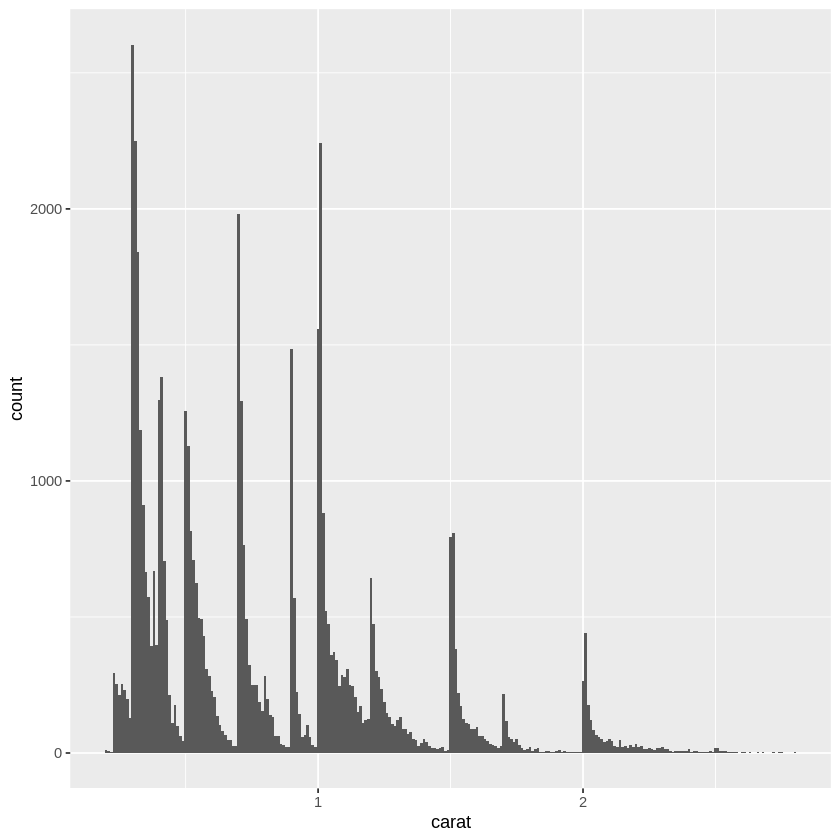

In [8]:
ggplot(data = smaller, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.01)


Clusters of similar values suggest that subgroups exist in your data.
To understand the subgroups, ask:

-   How are the observations within each cluster similar to each other?

-   How are the observations in separate clusters different from each other?

-   How can you explain or describe the clusters?

-   Why might the appearance of clusters be misleading?

The histogram below shows the length (in minutes) of 272 eruptions of the Old Faithful Geyser in Yellowstone National Park.
Eruption times appear to be clustered into two groups: there are short eruptions (of around 2 minutes) and long eruptions (4-5 minutes), but little in between.


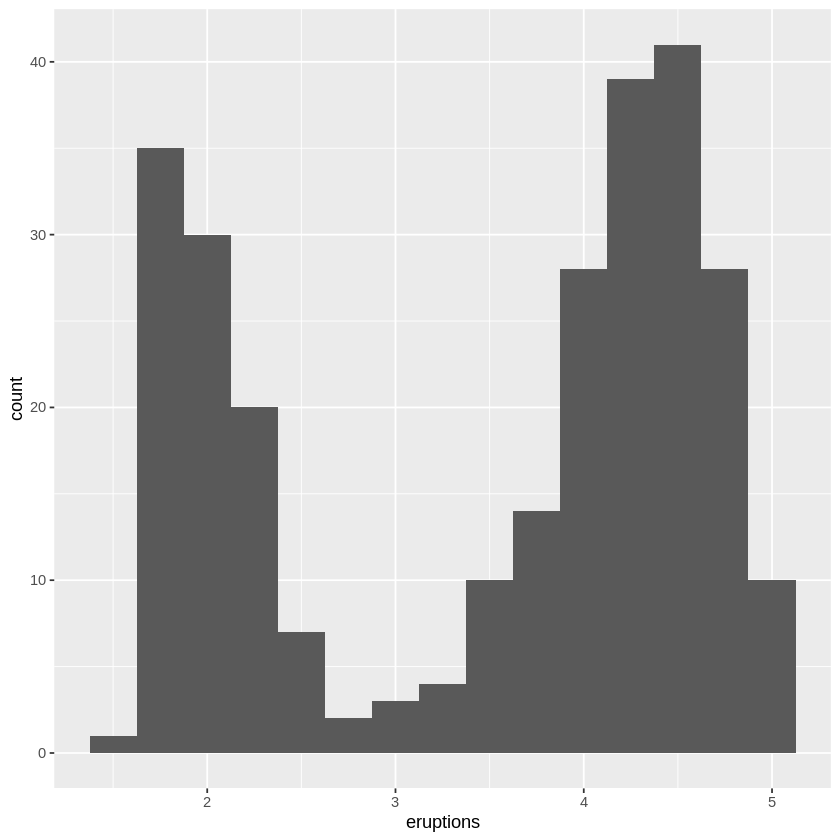

In [9]:
ggplot(data = faithful, mapping = aes(x = eruptions)) + 
  geom_histogram(binwidth = 0.25)



Many of the questions above will prompt you to explore a relationship *between* variables, for example, to see if the values of one variable can explain the behavior of another variable.
We'll get to that shortly.

### Unusual values

Outliers are observations that are unusual; data points that don't seem to fit the pattern.
Sometimes outliers are data entry errors; other times outliers suggest important new science.
When you have a lot of data, outliers are sometimes difficult to see in a histogram.
For example, take the distribution of the `y` variable from the diamonds dataset.
The only evidence of outliers is the unusually wide limits on the x-axis.


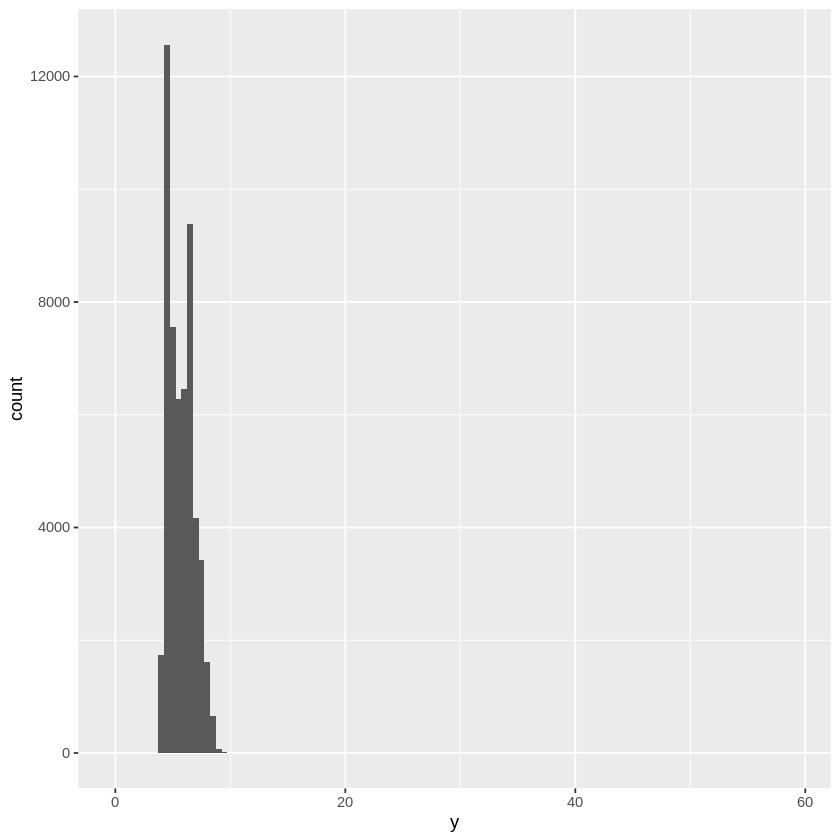

In [10]:
ggplot(data = diamonds, mapping = aes(x = y)) + 
  geom_histogram(binwidth = 0.5)


There are so many observations in the common bins that the rare bins are very short, making it very difficult to see them (although maybe if you stare intently at 0 you'll spot something).
To make it easy to see the unusual values, we need to zoom to small values of the y-axis with `coord_cartesian()`:


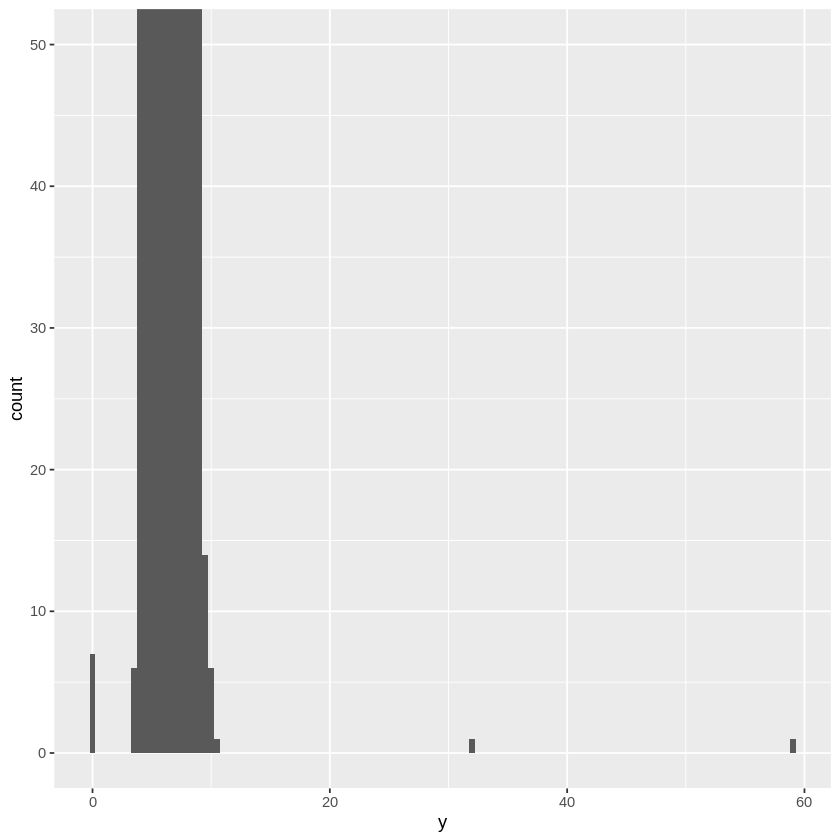

In [11]:
ggplot(data = diamonds, mapping = aes(x = y)) + 
  geom_histogram(binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))



`coord_cartesian()` also has an `xlim()` argument for when you need to zoom into the x-axis.
ggplot2 also has `xlim()` and `ylim()` functions that work slightly differently: they throw away the data outside the limits.

This allows us to see that there are three unusual values: 0, \~30, and \~60.
We pluck them out with dplyr:


In [12]:
old <- options(tibble.print_max = 10, tibble.print_min = 10)

In [13]:
unusual <- diamonds |> 
  filter(y < 3 | y > 20) |> 
  select(price, x, y, z) |>
  arrange(y)
unusual

price,x,y,z
<int>,<dbl>,<dbl>,<dbl>
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


In [14]:
options(old)


The `y` variable measures one of the three dimensions of these diamonds, in mm.
We know that diamonds can't have a width of 0mm, so these values must be incorrect.
We might also suspect that measurements of 32mm and 59mm are implausible: those diamonds are over an inch long, but don't cost hundreds of thousands of dollars!

It's good practice to repeat your analysis with and without the outliers.
If they have minimal effect on the results, and you can't figure out why they're there, it's reasonable to omit them, and move on.
However, if they have a substantial effect on your results, you shouldn't drop them without justification.
You'll need to figure out what caused them (e.g. a data entry error) and disclose that you removed them in your write-up.

### Exercises

1.  Explore the distribution of each of the `x`, `y`, and `z` variables in `diamonds`.
    What do you learn?
    Think about a diamond and how you might decide which dimension is the length, width, and depth.

2.  Explore the distribution of `price`.
    Do you discover anything unusual or surprising?
    (Hint: Carefully think about the `binwidth` and make sure you try a wide range of values.)

3.  How many diamonds are 0.99 carat?
    How many are 1 carat?
    What do you think is the cause of the difference?

4.  Compare and contrast `coord_cartesian()` vs `xlim()` or `ylim()` when zooming in on a histogram.
    What happens if you leave `binwidth` unset?
    What happens if you try and zoom so only half a bar shows?

## Missing values {#sec-missing-values-eda}

If you've encountered unusual values in your dataset, and simply want to move on to the rest of your analysis, you have two options.

1.  Drop the entire row with the strange values:


In [15]:
diamonds2 <- diamonds |> 
  filter(between(y, 3, 20))


I don't recommend this option because just because one measurement is invalid, doesn't mean all the measurements are.

Additionally, if you have low quality data, by time that you've applied this approach to every variable you might find that you don't have any data left!

2.  Instead, I recommend replacing the unusual values with missing values.
    The easiest way to do this is to use `mutate()` to replace the variable with a modified copy.
    You can use the `ifelse()` function to replace unusual values with `NA`:


In [16]:
diamonds2 <- diamonds |> 
  mutate(y = ifelse(y < 3 | y > 20, NA, y))


`ifelse()` has three arguments.
The first argument `test` should be a logical vector.
The result will contain the value of the second argument, `yes`, when `test` is `TRUE`, and the value of the third argument, `no`, when it is false.
Alternatively to `if_else()`, use `dplyr::case_when()`.
`case_when()` is particularly useful inside mutate when you want to create a new variable that relies on a complex combination of existing variables or would otherwise require multiple `if_else()` statements nested inside one another.

Like R, ggplot2 subscribes to the philosophy that missing values should never silently go missing.
It's not obvious where you should plot missing values, so ggplot2 doesn't include them in the plot, but it does warn that they've been removed:


Warning message:
“Removed 9 rows containing missing values (geom_point).”


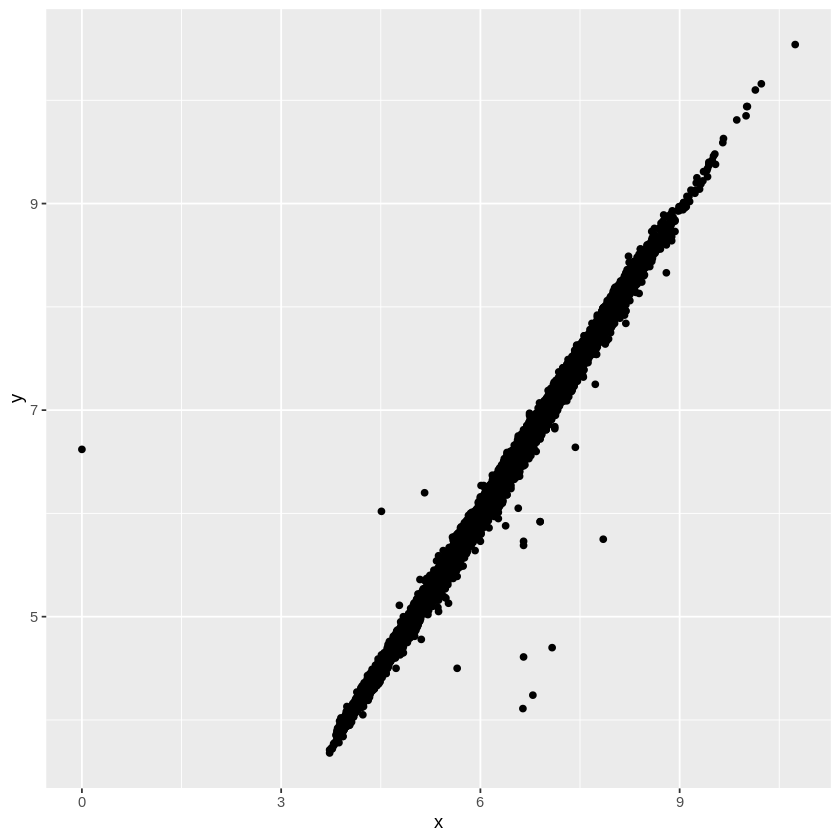

In [17]:
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) + 
  geom_point()


To suppress that warning, set `na.rm = TRUE`:


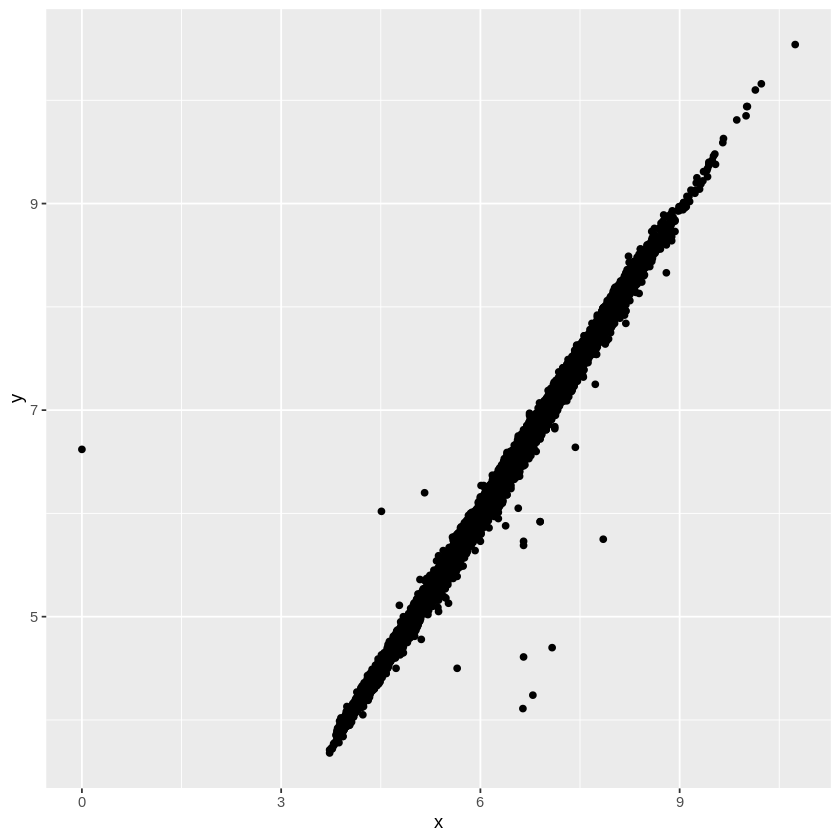

In [18]:
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) + 
  geom_point(na.rm = TRUE)



Other times you want to understand what makes observations with missing values different to observations with recorded values.
For example, in `nycflights13::flights`, missing values in the `dep_time` variable indicate that the flight was cancelled.
So you might want to compare the scheduled departure times for cancelled and non-cancelled times.
You can do this by making a new variable with `is.na()`.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



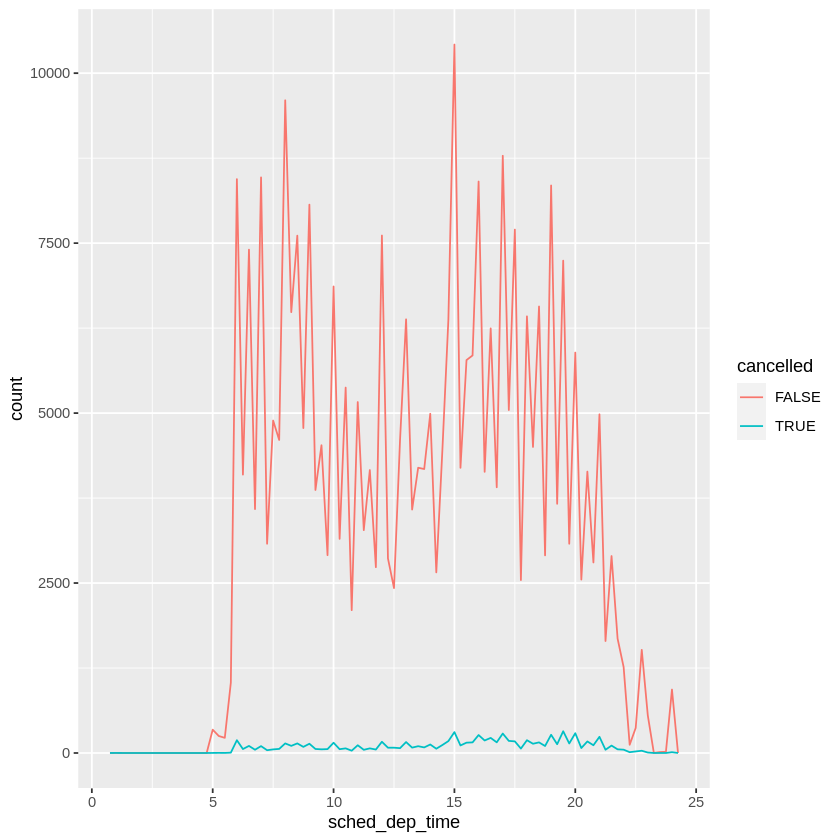

In [19]:
install.packages("nycflights13")
library("nycflights13")

nycflights13::flights |> 
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
  ) |> 
  ggplot(mapping = aes(sched_dep_time)) + 
  geom_freqpoly(mapping = aes(color = cancelled), binwidth = 1/4)


However this plot isn't great because there are many more non-cancelled flights than cancelled flights.
In the next section we'll explore some techniques for improving this comparison.

### Exercises

1.  What happens to missing values in a histogram?
    What happens to missing values in a bar chart?
    Why is there a difference in how missing values are handled in histograms and bar charts?

2.  What does `na.rm = TRUE` do in `mean()` and `sum()`?

## Covariation

If variation describes the behavior *within* a variable, covariation describes the behavior *between* variables.
**Covariation** is the tendency for the values of two or more variables to vary together in a related way.
The best way to spot covariation is to visualize the relationship between two or more variables.
How you do that depends again on the types of variables involved.

### A categorical and continuous variable {#sec-cat-cont}

It's common to want to explore the distribution of a continuous variable broken down by a categorical variable, as in the previous frequency polygon.
The default appearance of `geom_freqpoly()` is not that useful for that sort of comparison because the height is given by the count.
That means if one of the groups is much smaller than the others, it's hard to see the differences in the shapes of their distributions.
For example, let's explore how the price of a diamond varies with its quality (measured by `cut`):


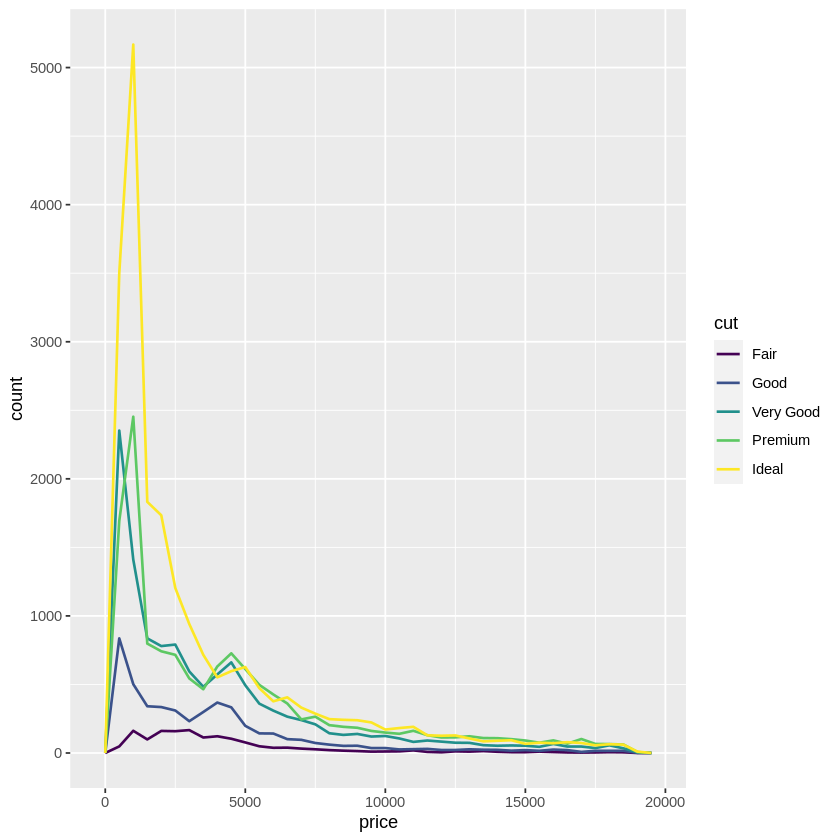

In [20]:
ggplot(data = diamonds, mapping = aes(x = price)) + 
  geom_freqpoly(mapping = aes(color = cut), binwidth = 500, size = 0.75)


It's hard to see the difference in distribution because the overall counts differ so much:


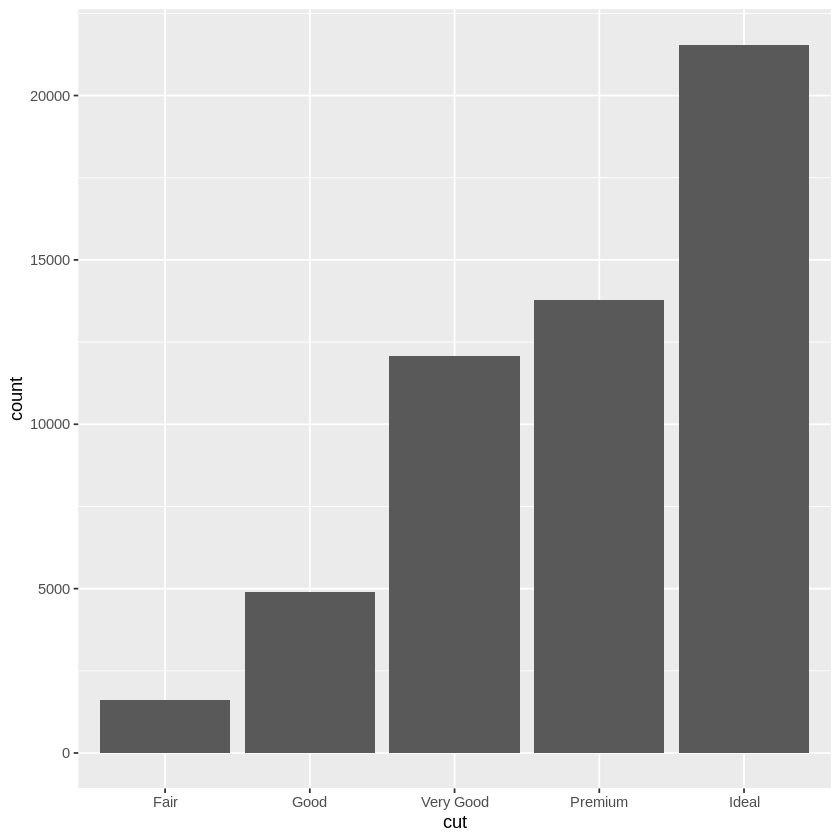

In [21]:
ggplot(data = diamonds, mapping = aes(x = cut)) + 
  geom_bar()


To make the comparison easier we need to swap what is displayed on the y-axis.
Instead of displaying count, we'll display the **density**, which is the count standardized so that the area under each frequency polygon is one.


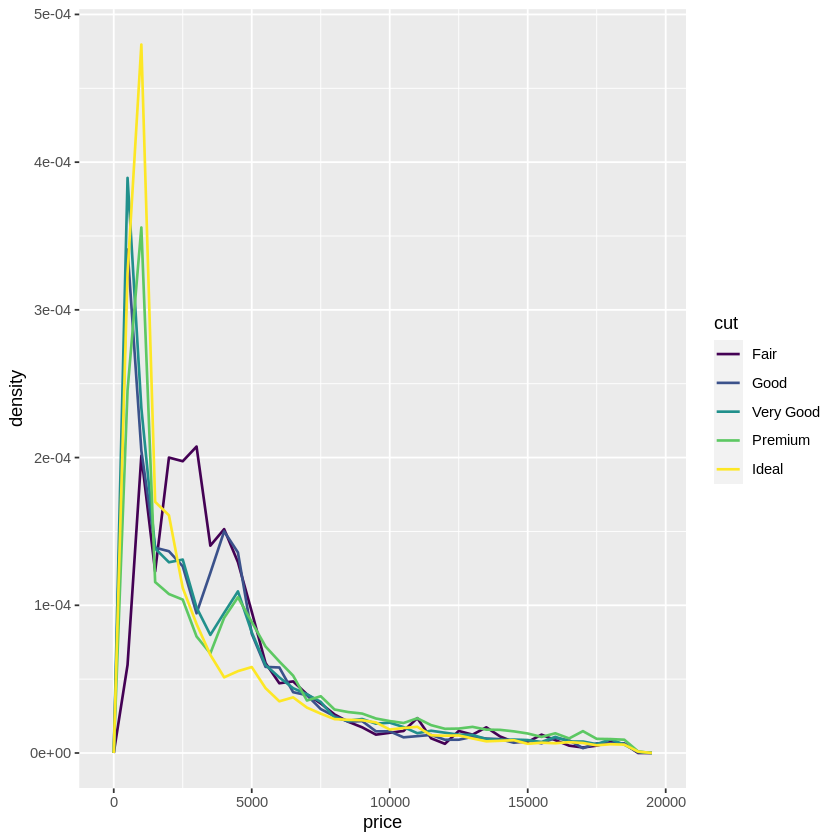

In [22]:
ggplot(data = diamonds, mapping = aes(x = price, y = after_stat(density))) + 
  geom_freqpoly(mapping = aes(color = cut), binwidth = 500, size = 0.75)



Note that we're mapping the density the `y`, but since `density` is not a variable in the `diamonds` dataset, we need to first calculate it.
We use the `after_stat()` function to do so.

There's something rather surprising about this plot - it appears that fair diamonds (the lowest quality) have the highest average price!
But maybe that's because frequency polygons are a little hard to interpret - there's a lot going on in this plot.

Another alternative to display the distribution of a continuous variable broken down by a categorical variable is the boxplot.
A **boxplot** is a type of visual shorthand for a distribution of values that is popular among statisticians.
Each boxplot consists of:

-   A box that stretches from the 25th percentile of the distribution to the 75th percentile, a distance known as the interquartile range (IQR).
    In the middle of the box is a line that displays the median, i.e. 50th percentile, of the distribution.
    These three lines give you a sense of the spread of the distribution and whether or not the distribution is symmetric about the median or skewed to one side.

-   Visual points that display observations that fall more than 1.5 times the IQR from either edge of the box.
    These outlying points are unusual so are plotted individually.

-   A line (or whisker) that extends from each end of the box and goes to the farthest non-outlier point in the distribution.


<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/153b9af53b33918353fda9b691ded68cd7f62f51/5b616/images/eda-boxplot.png" alt="img R" 
     
</center>


Let's take a look at the distribution of price by cut using `geom_boxplot()`:



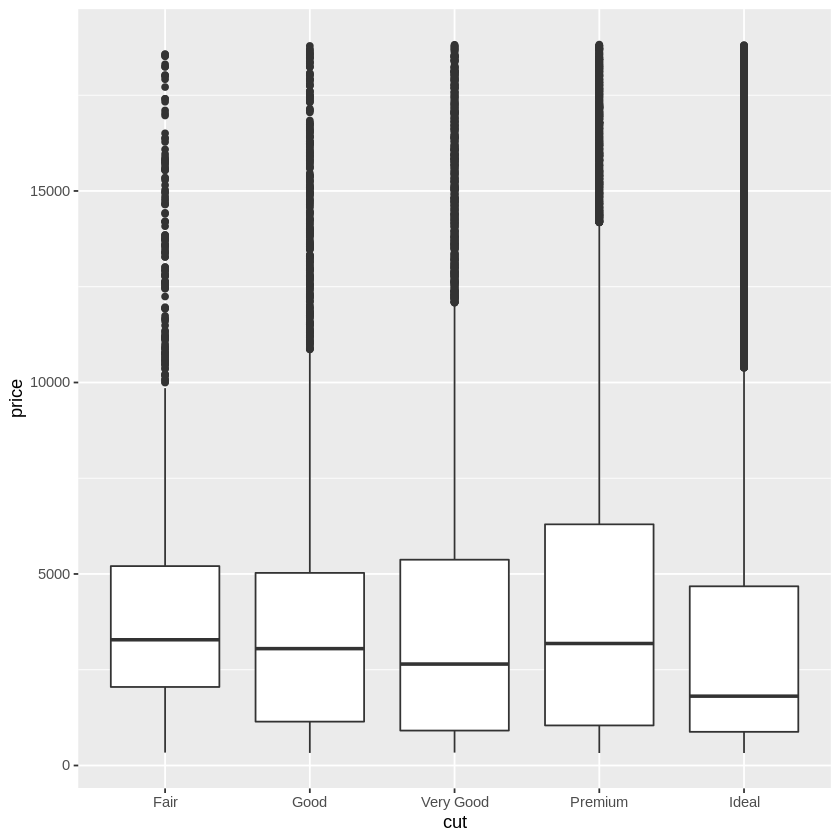

In [23]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()



We see much less information about the distribution, but the boxplots are much more compact so we can more easily compare them (and fit more on one plot).
It supports the counter-intuitive finding that better quality diamonds are cheaper on average!
In the exercises, you'll be challenged to figure out why.

`cut` is an ordered factor: fair is worse than good, which is worse than very good and so on.
Many categorical variables don't have such an intrinsic order, so you might want to reorder them to make a more informative display.
One way to do that is with the `reorder()` function.

For example, take the `class` variable in the `mpg` dataset.
You might be interested to know how highway mileage varies across classes:


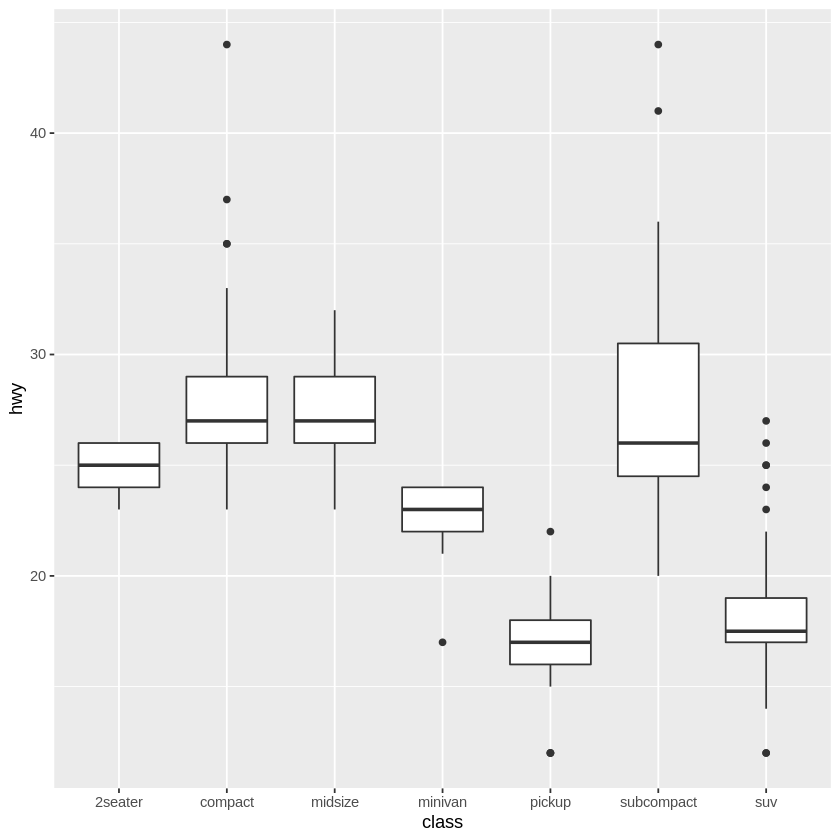

In [24]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot()



To make the trend easier to see, we can reorder `class` based on the median value of `hwy`:


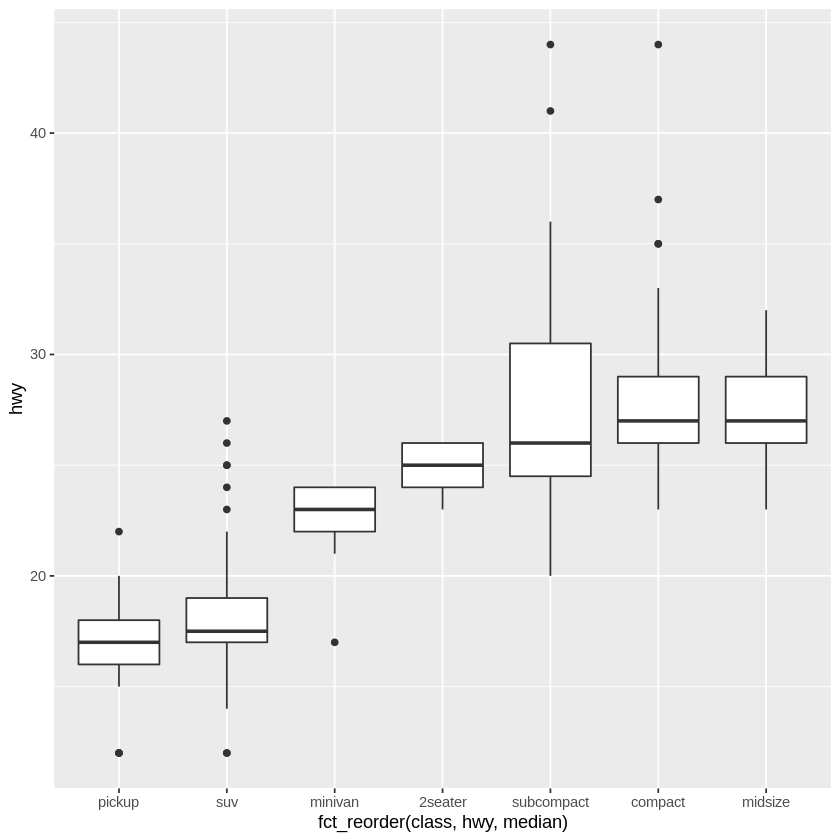

In [25]:
ggplot(data = mpg,
       mapping = aes(x = fct_reorder(class, hwy, median), y = hwy)) +
  geom_boxplot()


If you have long variable names, `geom_boxplot()` will work better if you flip it 90°.
You can do that by exchanging the x and y aesthetic mappings.


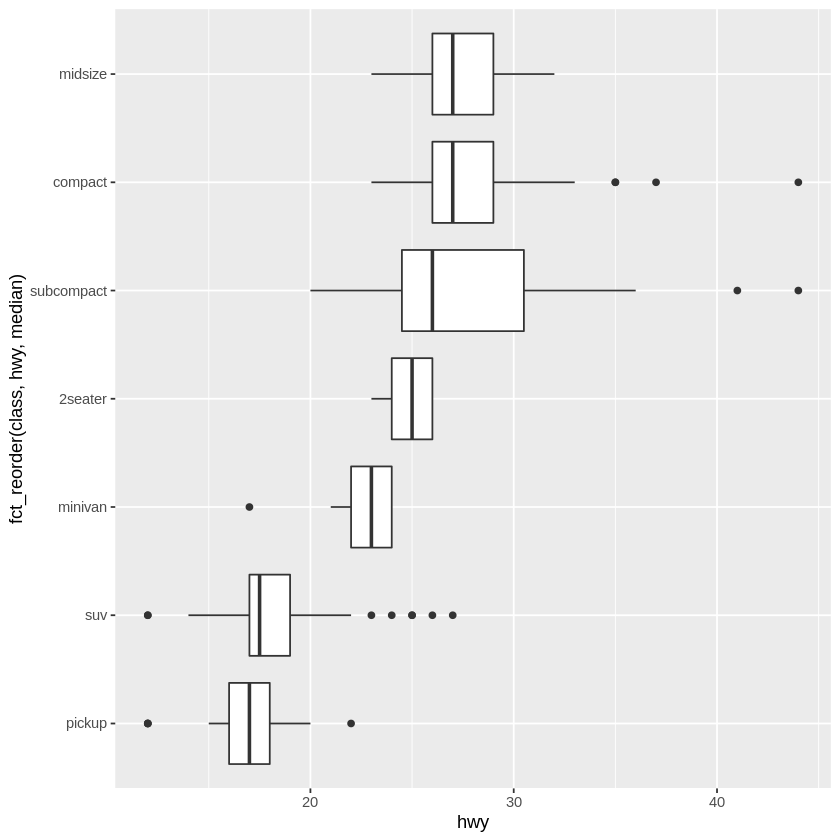

In [26]:
ggplot(data = mpg,
       mapping = aes(y = fct_reorder(class, hwy, median), x = hwy)) +
  geom_boxplot()


#### Exercises

1.  Use what you've learned to improve the visualization of the departure times of cancelled vs. non-cancelled flights.

2.  What variable in the diamonds dataset is most important for predicting the price of a diamond?
    How is that variable correlated with cut?
    Why does the combination of those two relationships lead to lower quality diamonds being more expensive?

3.  Instead of exchanging the x and y variables, add `coord_flip()` as a new layer to the vertical boxplot to create a horizontal one.
    How does this compare to using exchanging the variables?

4.  One problem with boxplots is that they were developed in an era of much smaller datasets and tend to display a prohibitively large number of "outlying values".
    One approach to remedy this problem is the letter value plot.
    Install the lvplot package, and try using `geom_lv()` to display the distribution of price vs cut.
    What do you learn?
    How do you interpret the plots?

5.  Compare and contrast `geom_violin()` with a faceted `geom_histogram()`, or a coloured `geom_freqpoly()`.
    What are the pros and cons of each method?

6.  If you have a small dataset, it's sometimes useful to use `geom_jitter()` to see the relationship between a continuous and categorical variable.
    The ggbeeswarm package provides a number of methods similar to `geom_jitter()`.
    List them and briefly describe what each one does.

### Two categorical variables

To visualize the covariation between categorical variables, you'll need to count the number of observations for each combination of levels of these categorical variables.
One way to do that is to rely on the built-in `geom_count()`:


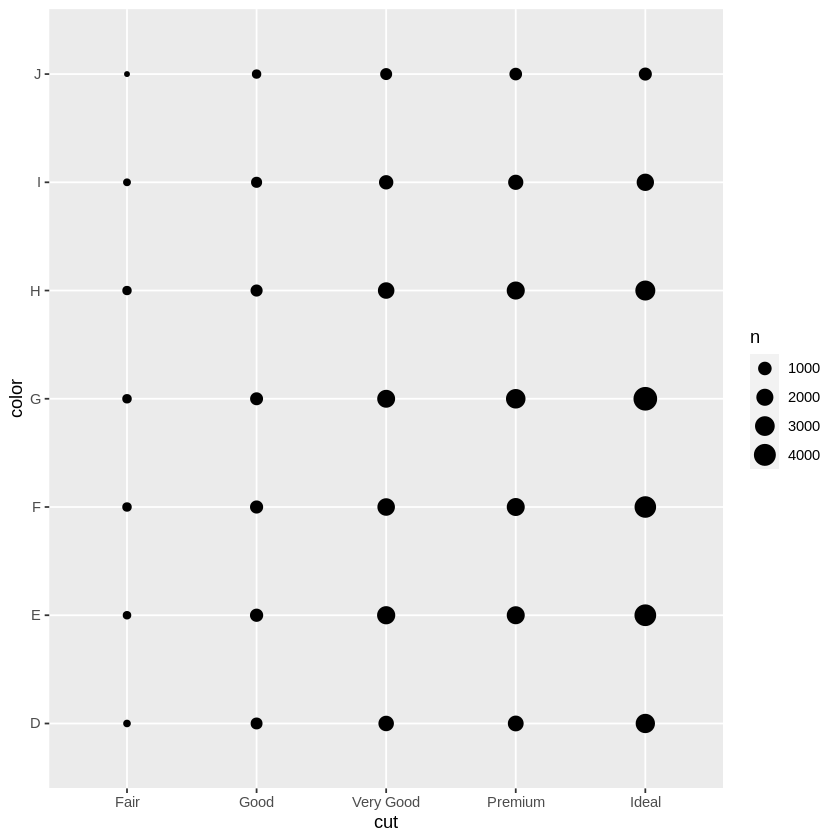

In [28]:
ggplot(data = diamonds, mapping = aes(x = cut, y = color)) +
  geom_count()


The size of each circle in the plot displays how many observations occurred at each combination of values.
Covariation will appear as a strong correlation between specific x values and specific y values.

A more commonly used way of representing the covariation between two categorical variables is using a segmented bar chart.
In creating this bar chart, we map the variable we want to divide the data into first to the `x` aesthetic and the variable we then further want to divide each group into to the `fill` aesthetic.


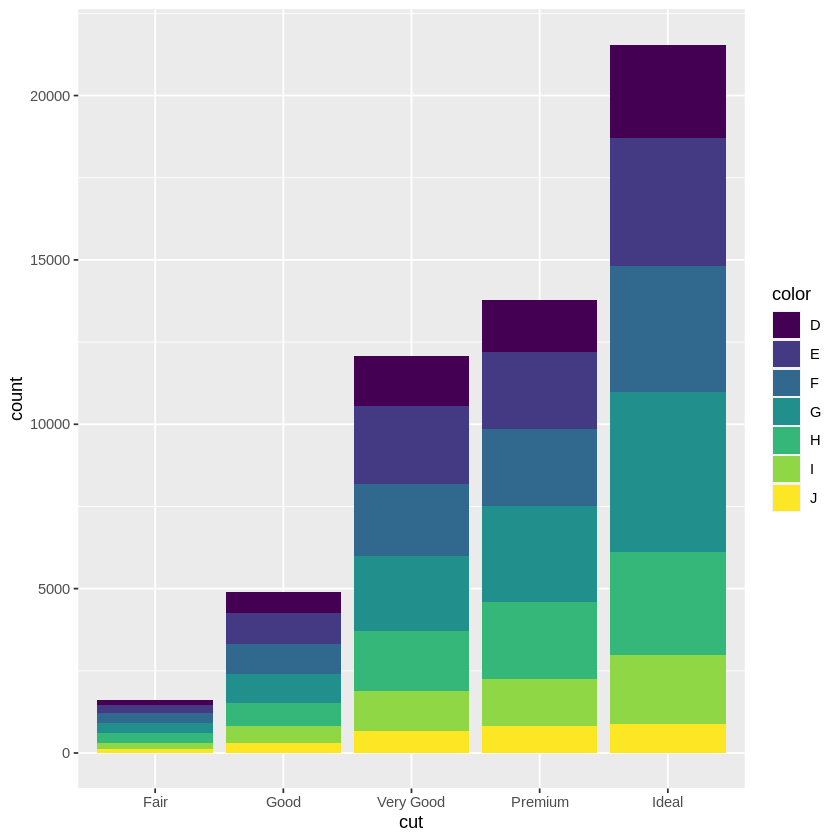

In [29]:
ggplot(data = diamonds, mapping = aes(x = cut, fill = color)) +
  geom_bar()


However, in order to get a better sense of the relationship between these two variables, you should compare proportions instead of counts across groups.


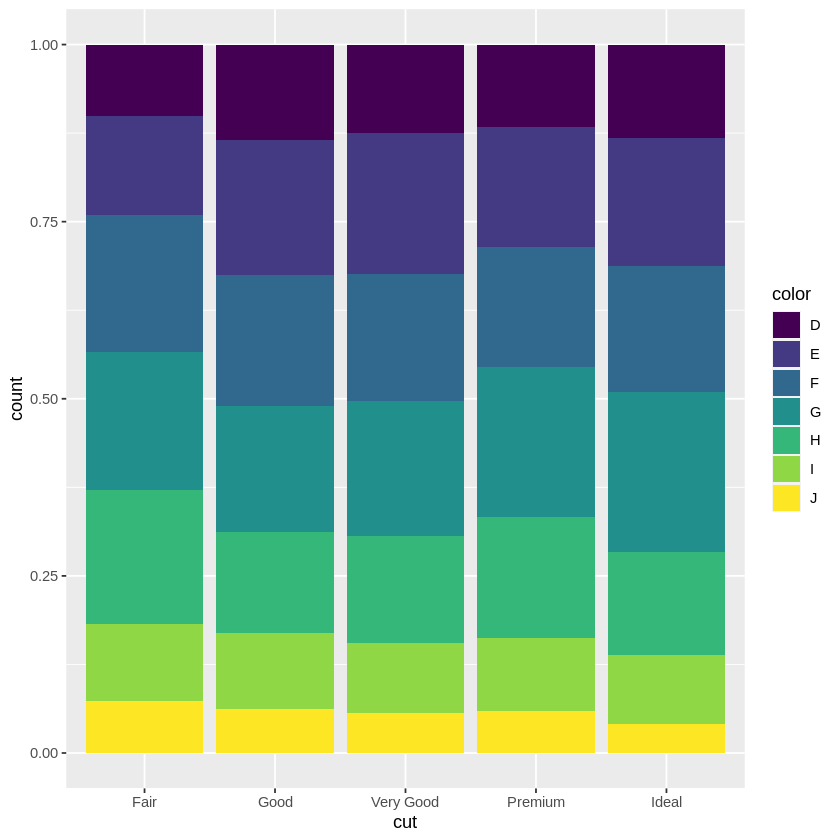

In [30]:
ggplot(data = diamonds, mapping = aes(x = cut, fill = color)) +
  geom_bar(position = "fill")



Another approach for exploring the relationship between these variables is computing the counts with dplyr:


In [31]:
diamonds |> 
  count(color, cut)

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337



Then visualize with `geom_tile()` and the fill aesthetic:


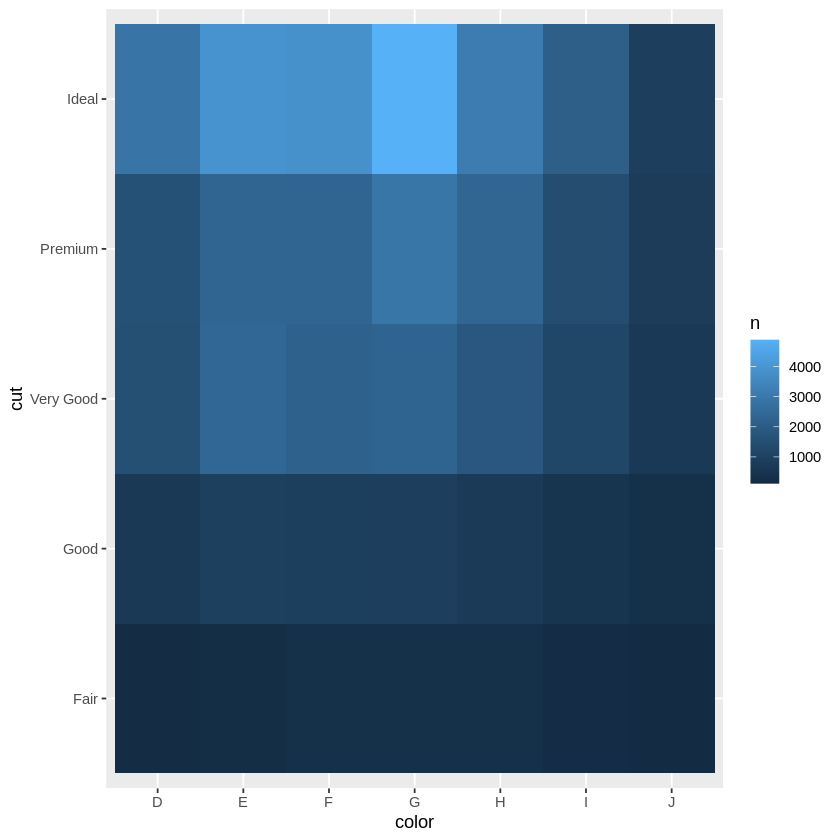

In [32]:
diamonds |> 
  count(color, cut) |>  
  ggplot(mapping = aes(x = color, y = cut)) +
  geom_tile(mapping = aes(fill = n))



If the categorical variables are unordered, you might want to use the seriation package to simultaneously reorder the rows and columns in order to more clearly reveal interesting patterns.
For larger plots, you might want to try the heatmaply package, which creates interactive plots.

#### Exercises

1.  How could you rescale the count dataset above to more clearly show the distribution of cut within color, or color within cut?

2.  How does the segmented bar chart change if color is mapped to the `x` aesthetic and `cut` is mapped to the `fill` aesthetic?
    Calculate the counts that fall into each of the segments.

3.  Use `geom_tile()` together with dplyr to explore how average flight delays vary by destination and month of year.
    What makes the plot difficult to read?
    How could you improve it?

4.  Why is it slightly better to use `aes(x = color, y = cut)` rather than `aes(x = cut, y = color)` in the example above?

### Two continuous variables

You've already seen one great way to visualize the covariation between two continuous variables: draw a scatterplot with `geom_point()`.
You can see covariation as a pattern in the points.
For example, you can see an exponential relationship between the carat size and price of a diamond.


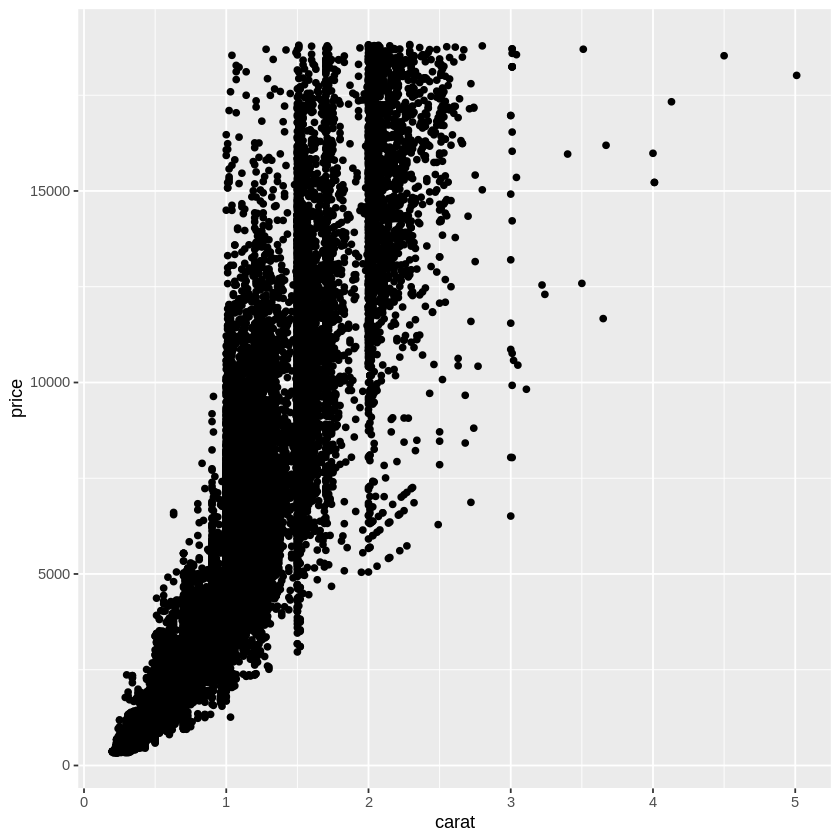

In [33]:
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) +
  geom_point()


Scatterplots become less useful as the size of your dataset grows, because points begin to overplot, and pile up into areas of uniform black (as above).
You've already seen one way to fix the problem: using the `alpha` aesthetic to add transparency.


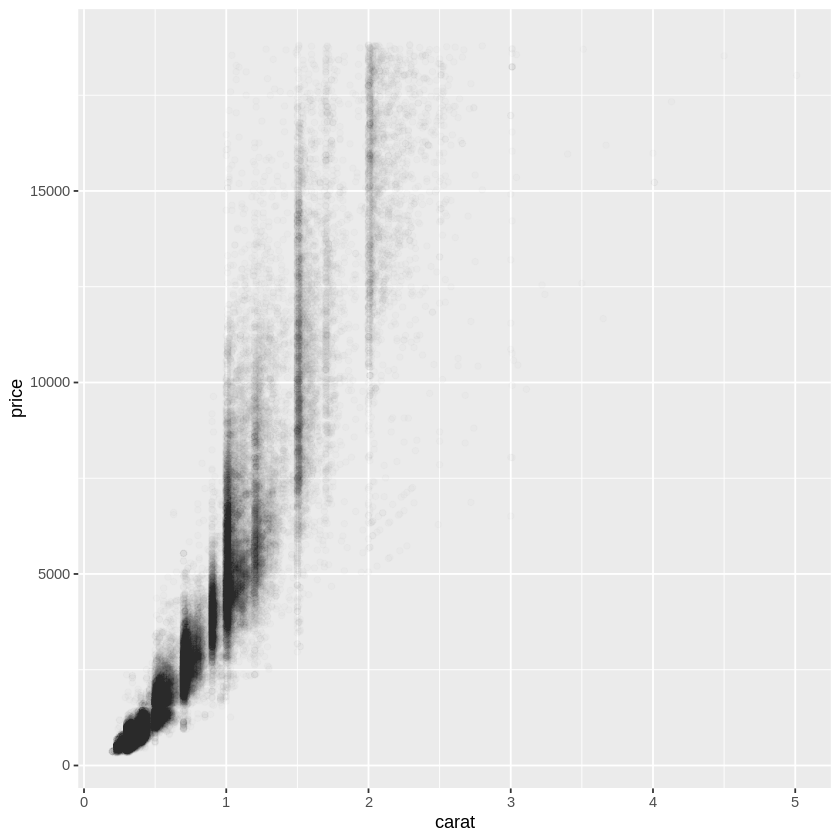

In [34]:
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) + 
  geom_point(alpha = 1 / 100)



But using transparency can be challenging for very large datasets.
Another solution is to use bin.
Previously you used `geom_histogram()` and `geom_freqpoly()` to bin in one dimension.
Now you'll learn how to use `geom_bin2d()` and `geom_hex()` to bin in two dimensions.

`geom_bin2d()` and `geom_hex()` divide the coordinate plane into 2d bins and then use a fill color to display how many points fall into each bin.
`geom_bin2d()` creates rectangular bins.
`geom_hex()` creates hexagonal bins.
You will need to install the hexbin package to use `geom_hex()`.


Warning message:
“Computation failed in `stat_binhex()`:
”


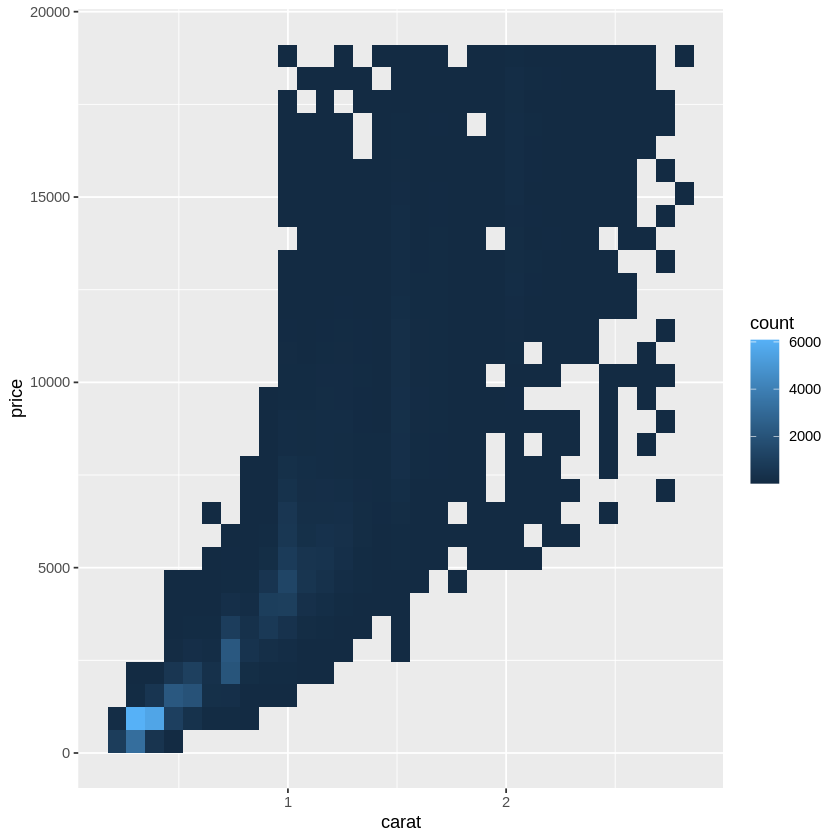

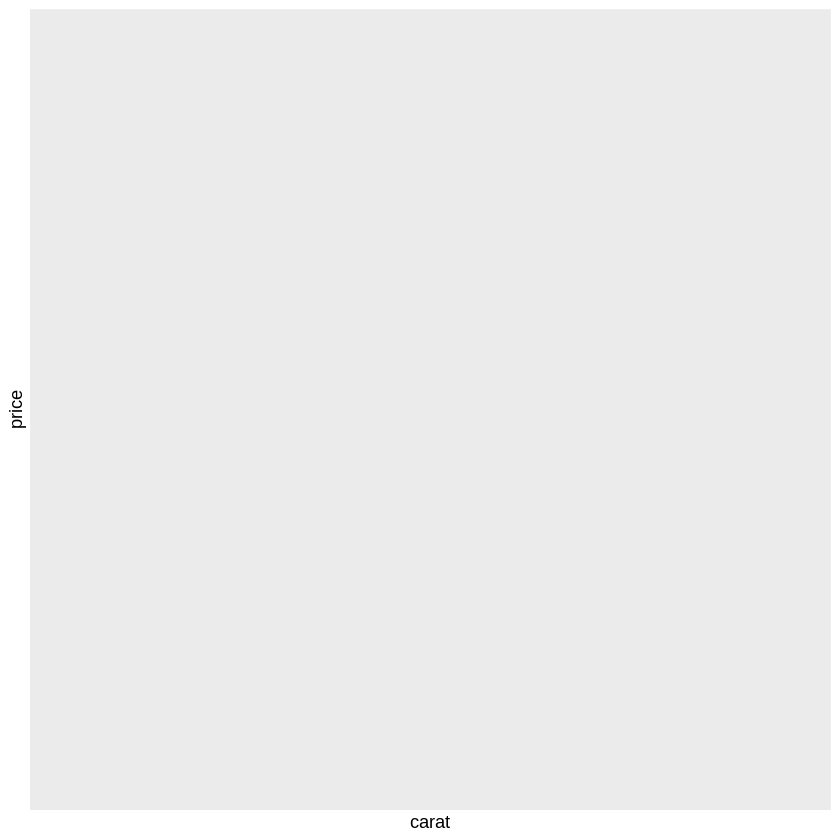

In [35]:
ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
  geom_bin2d()

# install.packages("hexbin")
ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
  geom_hex()



Another option is to bin one continuous variable so it acts like a categorical variable.
Then you can use one of the techniques for visualizing the combination of a categorical and a continuous variable that you learned about.
For example, you could bin `carat` and then for each group, display a boxplot:



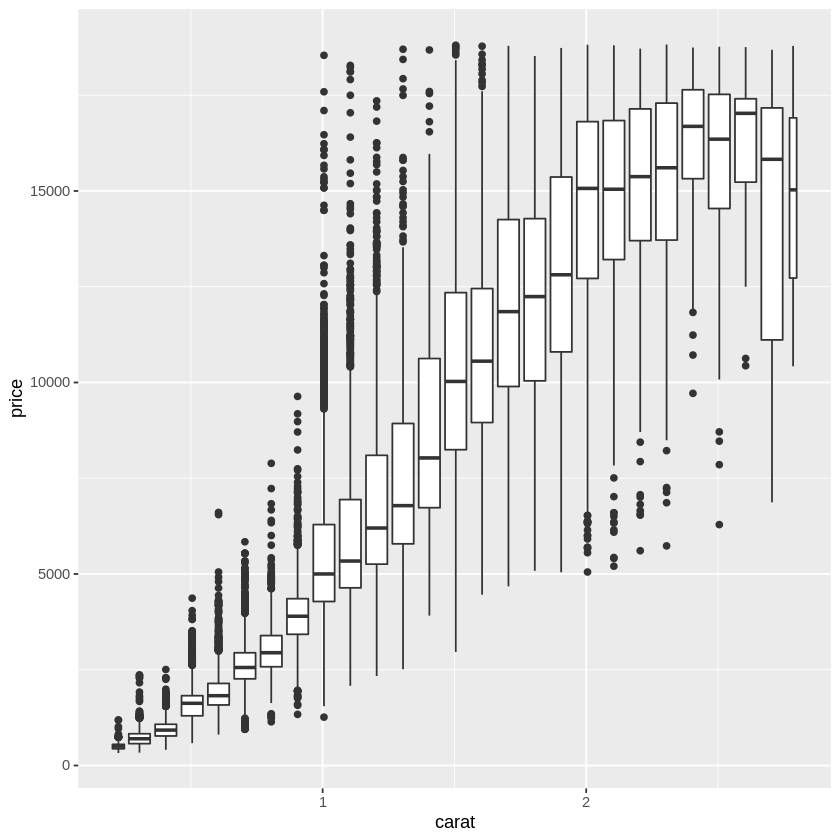

In [36]:
ggplot(data = smaller, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))



`cut_width(x, width)`, as used above, divides `x` into bins of width `width`.
By default, boxplots look roughly the same (apart from number of outliers) regardless of how many observations there are, so it's difficult to tell that each boxplot summaries a different number of points.
One way to show that is to make the width of the boxplot proportional to the number of points with `varwidth = TRUE`.

Another approach is to display approximately the same number of points in each bin.
That's the job of `cut_number()`:


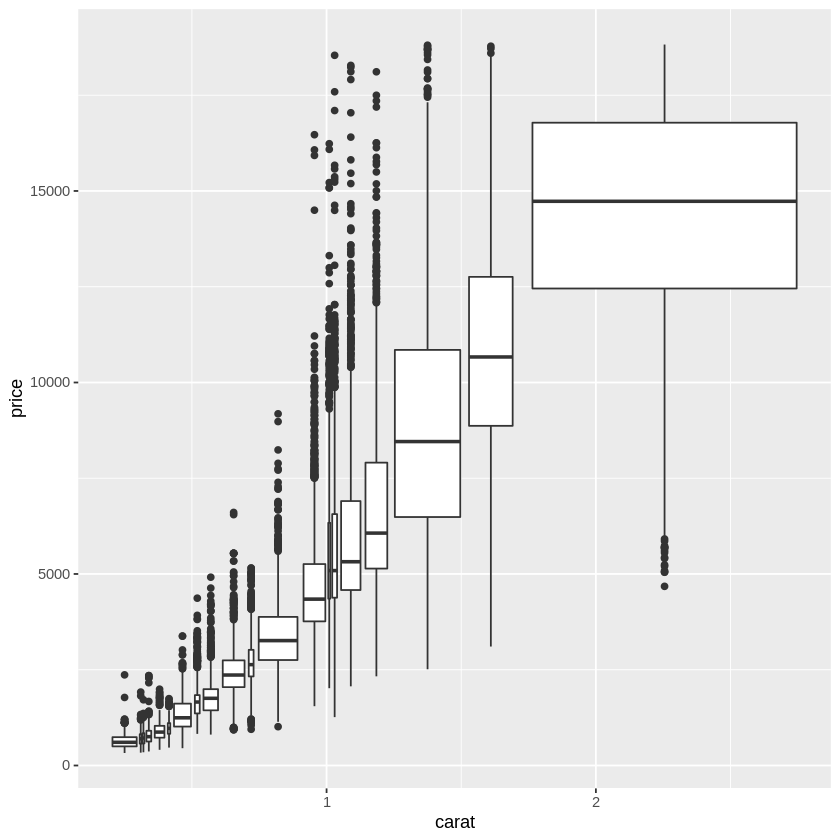

In [37]:
ggplot(data = smaller, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_number(carat, 20)))



#### Exercises

1.  Instead of summarizing the conditional distribution with a boxplot, you could use a frequency polygon.
    What do you need to consider when using `cut_width()` vs `cut_number()`?
    How does that impact a visualization of the 2d distribution of `carat` and `price`?

2.  Visualize the distribution of carat, partitioned by price.

3.  How does the price distribution of very large diamonds compare to small diamonds?
    Is it as you expect, or does it surprise you?

4.  Combine two of the techniques you've learned to visualize the combined distribution of cut, carat, and price.

5.  Two dimensional plots reveal outliers that are not visible in one dimensional plots.
    For example, some points in the plot below have an unusual combination of `x` and `y` values, which makes the points outliers even though their `x` and `y` values appear normal when examined separately.


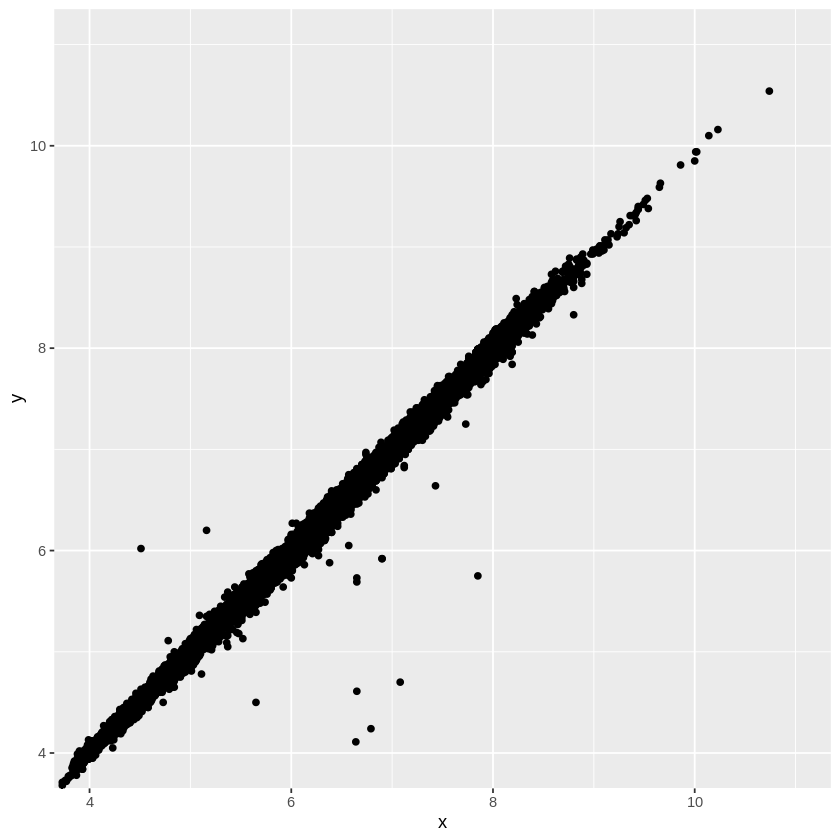

In [38]:
ggplot(data = diamonds, mapping = aes(x = x, y = y)) +
  geom_point() +
  coord_cartesian(xlim = c(4, 11), ylim = c(4, 11))


 Why is a scatterplot a better display than a binned plot for this case?

## Patterns and models

Patterns in your data provide clues about relationships.
If a systematic relationship exists between two variables it will appear as a pattern in the data.
If you spot a pattern, ask yourself:

-   Could this pattern be due to coincidence (i.e. random chance)?

-   How can you describe the relationship implied by the pattern?

-   How strong is the relationship implied by the pattern?

-   What other variables might affect the relationship?

-   Does the relationship change if you look at individual subgroups of the data?

A scatterplot of Old Faithful eruption lengths versus the wait time between eruptions shows a pattern: longer wait times are associated with longer eruptions.
The scatterplot also displays the two clusters that we noticed above.



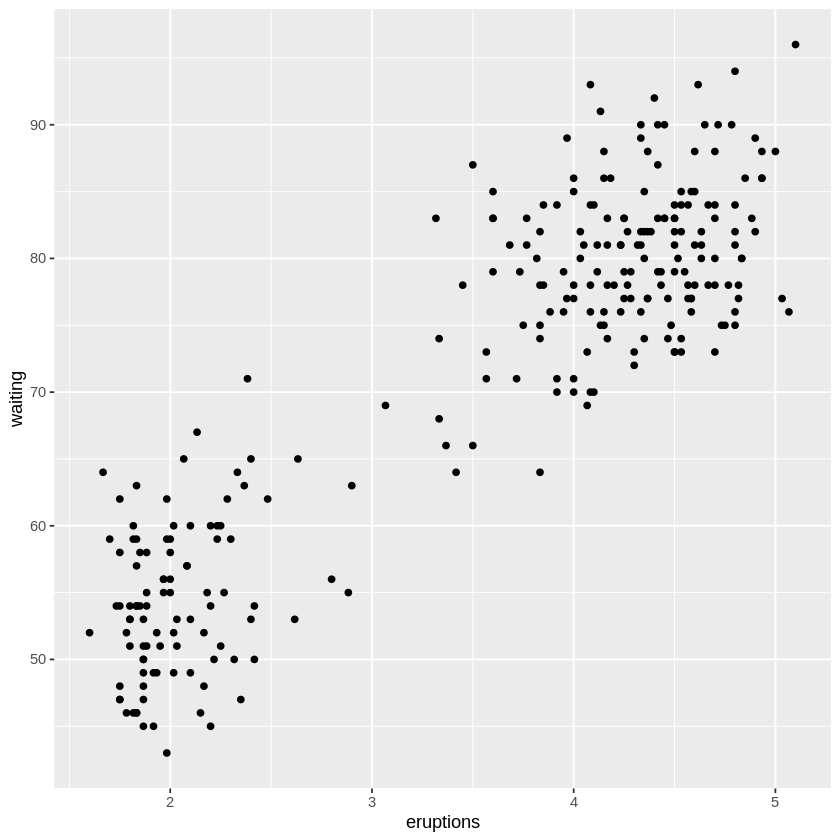

In [39]:
ggplot(data = faithful, mapping = aes(x = eruptions, y = waiting)) + 
  geom_point()


Patterns provide one of the most useful tools for data scientists because they reveal covariation.
If you think of variation as a phenomenon that creates uncertainty, covariation is a phenomenon that reduces it.
If two variables covary, you can use the values of one variable to make better predictions about the values of the second.
If the covariation is due to a causal relationship (a special case), then you can use the value of one variable to control the value of the second.

Models are a tool for extracting patterns out of data.
For example, consider the diamonds data.
It's hard to understand the relationship between cut and price, because cut and carat, and carat and price are tightly related.
It's possible to use a model to remove the very strong relationship between price and carat so we can explore the subtleties that remain.
The following code fits a model that predicts `price` from `carat` and then computes the residuals (the difference between the predicted value and the actual value).
The residuals give us a view of the price of the diamond, once the effect of carat has been removed.
Note that instead of using the raw values of `price` and `carat`, we log transform them first, and fit a model to the log-transformed values.
Then, we exponentiate the residuals to put them back in the scale of raw prices.


In [42]:
install.packages("tidymodels")
library(tidymodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("tidymodels"):
“installation of package ‘tidymodels’ had non-zero exit status”


ERROR: ignored

In [49]:

diamonds <- diamonds |>
  mutate(
    log_price = log(price),
    log_carat = log(carat)
  )

diamonds_fit <- linear_reg() |>
  fit(log_price ~ log_carat, data = diamonds)

diamonds_aug <- augment(diamonds_fit, new_data = diamonds) |>
  mutate(.resid = exp(.resid))

ggplot(data = diamonds_aug, mapping = aes(x = carat, y = .resid)) + 
  geom_point()

ERROR: ignored


Once you've removed the strong relationship between carat and price, you can see what you expect in the relationship between cut and price: relative to their size, better quality diamonds are more expensive.


In [43]:
ggplot(data = diamonds_aug, mapping = aes(x = cut, y = .resid)) + 
  geom_boxplot()

ERROR: ignored


We're not discussing modelling in this book because understanding what models are and how they work is easiest once you have tools of data wrangling and programming in hand.

## ggplot2 calls

As we move on from these introductory chapters, we'll transition to a more concise expression of ggplot2 code.
So far we've been very explicit, which is helpful when you are learning:


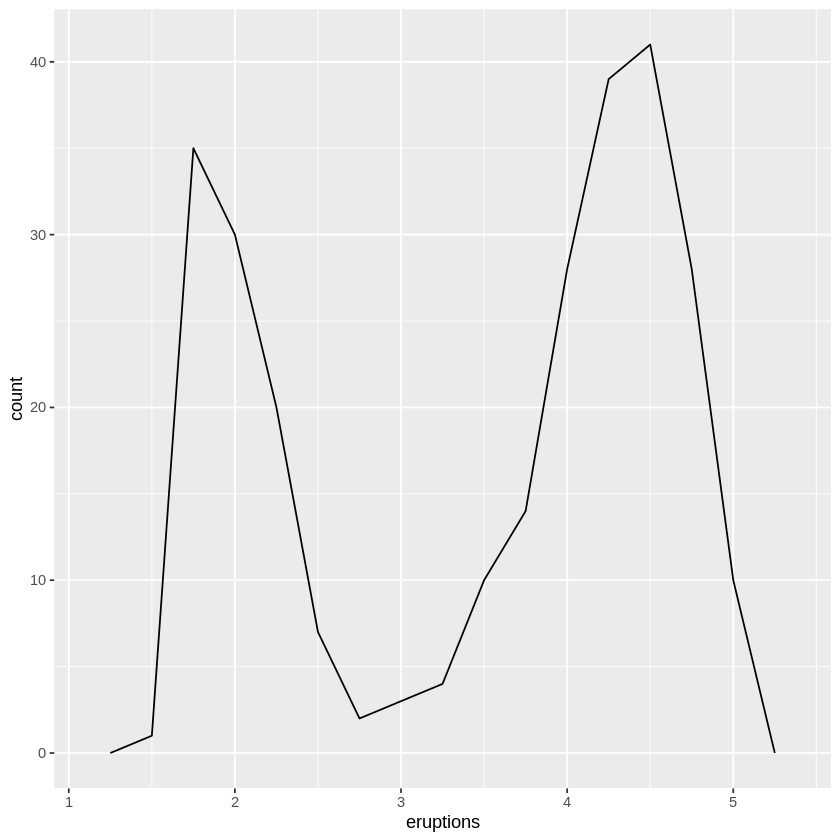

In [44]:
ggplot(data = faithful, mapping = aes(x = eruptions)) + 
  geom_freqpoly(binwidth = 0.25)


Typically, the first one or two arguments to a function are so important that you should know them by heart.
The first two arguments to `ggplot()` are `data` and `mapping`, and the first two arguments to `aes()` are `x` and `y`.
In the remainder of the book, we won't supply those names.
That saves typing, and, by reducing the amount of boilerplate, makes it easier to see what's different between plots.
That's a really important programming concern that we'll come back to in [Chapter -@sec-functions].

Rewriting the previous plot more concisely yields:


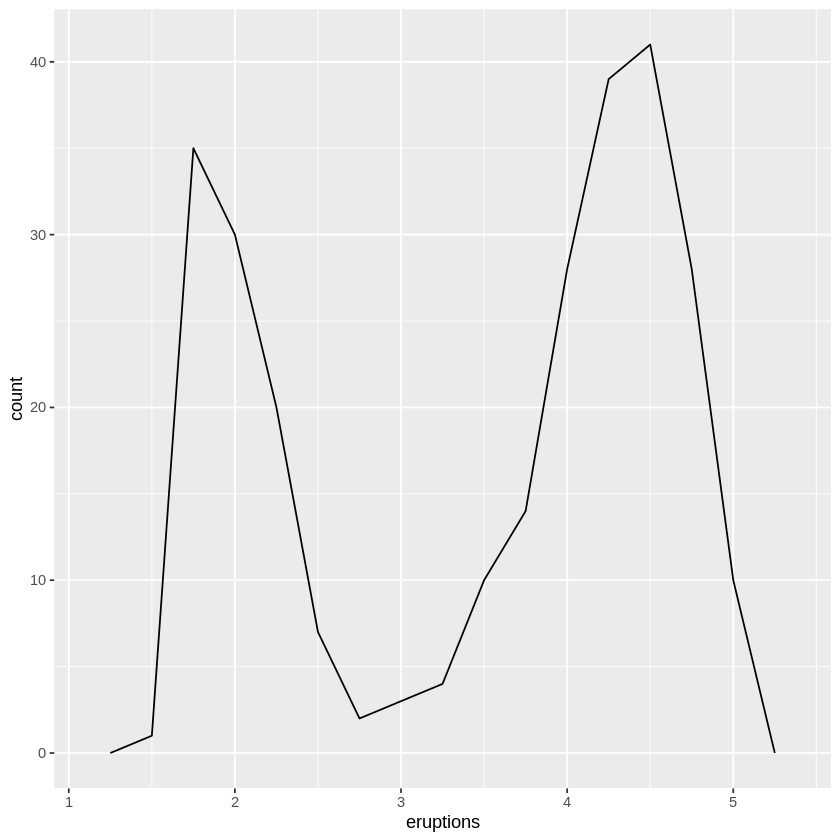

In [45]:
ggplot(faithful, aes(eruptions)) + 
  geom_freqpoly(binwidth = 0.25)


Sometimes we'll turn the end of a pipeline of data transformation into a plot.
Watch for the transition from `|>` to `+`.
I wish this transition wasn't necessary but unfortunately ggplot2 was created before the pipe was discovered.


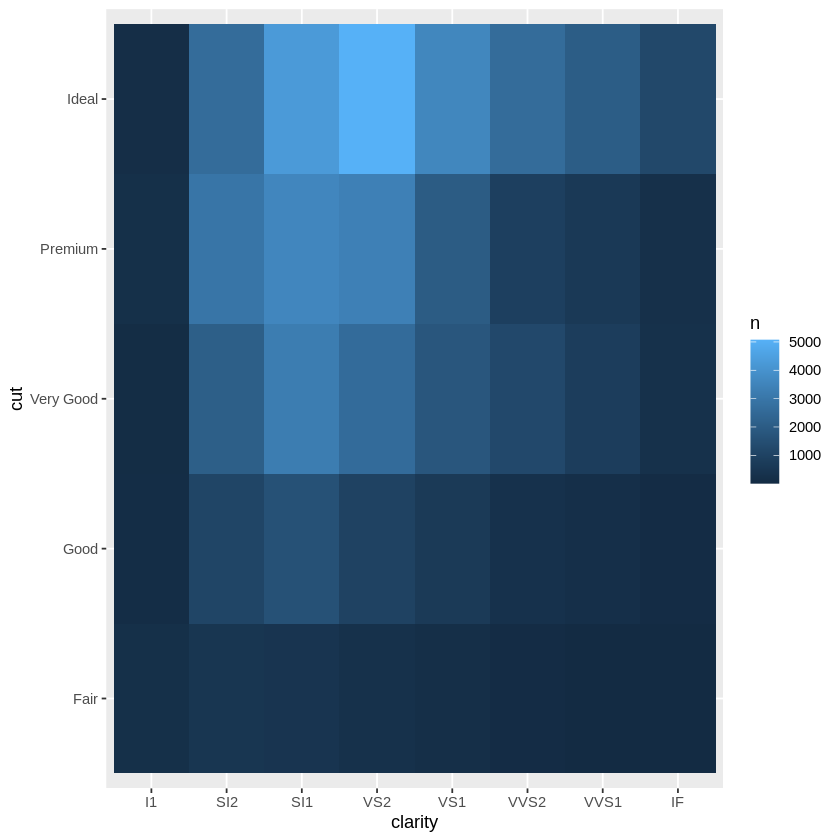

In [46]:
diamonds |> 
  count(cut, clarity) |> 
  ggplot(aes(clarity, cut, fill = n)) + 
  geom_tile()


## Learning more

If you want to learn more about the mechanics of ggplot2, I'd highly recommend reading the [ggplot2 book](https://ggplot2-book.org).
It's been recently updated and has much more space to explore all the facets of visualization.

Another useful resource is the [*R Graphics Cookbook*](https://www.amazon.com/Graphics-Cookbook-Practical-Recipes-Visualizing/dp/1449316956) by Winston Chang.
Much of the contents are available online at <http://www.cookbook-r.com/Graphs/>.

I also recommend [*Graphical Data Analysis with R*](https://www.amazon.com/Graphical-Data-Analysis-Chapman-Hall/dp/1498715230), by Antony Unwin.
This is a book-length treatment similar to the material covered in this chapter, but has the space to go into much greater depth.
